# Classifier Network
 - Follow the Week 3 lecture slides

In [1]:
#import libraries

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,auc
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Lets set up to put all output plots in one output PDF

outputname = 'projectile_classification_week3.pdf'

from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages(outputname)


## Input data


Read the Input file in a Pandas DataFrame

In [3]:
# First we prepare the dataframe in which we get the data
col_names = ['tof','height','distance','velocity','angleDegrees']
cols = [0,1,2,3]
# Now here I purposely dropped the last column (read in only first 4)


projdf = pd.read_csv('input/projectile_input4_100k.txt',sep=' ',index_col=None,usecols=cols,names=col_names)

In [4]:
projdf.head(5)

,tof,height,distance,velocity
0,2.355650,21.04420,107.6150,28.2299
1,3.882820,27.22980,24.9687,19.1289
2,1.926440,14.07410,31.7454,17.1848
3,0.564022,1.20643,12.0678,10.8245
4,4.016770,61.18770,192.2680,38.9703


### Now for the classification task let us create labels for high and low velocity
- high velocity if velocity > 25.0 & < 35.0 : <mark>Label = 1</mark>
- low velocity  otherwise : <mark>Label = 0</mark>

In [5]:
projdf['highvel'] = projdf.apply(lambda row: 1.0 if row.velocity > 25.0 and row.velocity < 35.0 else 0.0, axis=1)

In [6]:
projdf.head()

# We see that a new column "highvel" is added into the dataframe
# highvel =1.0 if 25.0 < velocity < 35.0
#         =0.0 otherwise 

,tof,height,distance,velocity,highvel
0,2.355650,21.04420,107.6150,28.2299,1.0
1,3.882820,27.22980,24.9687,19.1289,0.0
2,1.926440,14.07410,31.7454,17.1848,0.0
3,0.564022,1.20643,12.0678,10.8245,0.0
4,4.016770,61.18770,192.2680,38.9703,0.0


## Training Goal

Now we are going to try make the network learn the following,

- if the velocity is between 25 and 35 (i.e. the target y value(or highvel) is 1.0), then NN should predict 1.0
- else (i.e. the target y value(or highvel) is 0.0), the NN should predict 0.0


In [7]:
# Split the label column as y, and the input variables as X
X = projdf[['tof','height','distance']].values
y = projdf[['highvel']].values
print(f'Shapes of data, X, y are {projdf.shape}, {X.shape} , {y.shape}')

n_features = X.shape[1]
print(f'The number of input variables is {n_features}')

Shapes of data, X, y are (100000, 5), (100000, 3) , (100000, 1)
The number of input variables is 3


### Splitting the data into train and test set

- We will now split the data into two parts, a "training" and a "testing" part.
- The idea is to use the training set to train the network, and as it trains,use the testing part to judge how the training is going.

In [8]:
# We shall split the dataset into training and testing in equal measure (50% each)
# but we can do any other combination as well.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(50000, 3) (50000, 3) (50000, 1) (50000, 1)


## Build the Neural Network 
 - Now we declare a neural network with **2 hidden layers**
 - first hidden layer has **8 neurons**, and takes n_features number of inputs
 - second hidden layer has **4 neurons**
 - output layer has **1 neuron**  BUT with a <mark>sigmoid</mark> activation function
 
 ```we choose sigmoid here, since we would like the output to be interpreted as a 'probability'
  Note that our desired output is 0 or 1 ... in practice the output will be
 some value between 0 and 1.``` 

In [9]:
model = Sequential()
model.add(Dense(8, activation='relu', kernel_initializer='he_normal', input_dim=n_features))
model.add(Dense(4, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))

### Compile the model

In [10]:
#compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## We chose a different loss function here, as well as added 'accuracy' to the things
# the history object should retain during training.


### Train the model

In [11]:
#Now we train the model
history = model.fit(X_train,y_train,epochs=200,batch_size=100,validation_data=(X_test,y_test),verbose=1)
print(history.history.keys())

Epoch 1/200
500/500 [==============================] - 1s 3ms/step - loss: 1.0739 - accuracy: 0.5760 - val_loss: 0.6692 - val_accuracy: 0.6772
Epoch 2/200
500/500 [==============================] - 2s 3ms/step - loss: 0.6395 - accuracy: 0.6645 - val_loss: 0.6200 - val_accuracy: 0.6392
Epoch 3/200
500/500 [==============================] - 1s 2ms/step - loss: 0.6086 - accuracy: 0.6168 - val_loss: 0.6009 - val_accuracy: 0.5905
Epoch 4/200
500/500 [==============================] - 1s 2ms/step - loss: 0.5970 - accuracy: 0.6023 - val_loss: 0.5950 - val_accuracy: 0.5948
Epoch 5/200
500/500 [==============================] - 1s 2ms/step - loss: 0.5932 - accuracy: 0.6011 - val_loss: 0.5929 - val_accuracy: 0.6127
Epoch 6/200
500/500 [==============================] - 1s 1ms/step - loss: 0.5910 - accuracy: 0.6002 - val_loss: 0.5913 - val_accuracy: 0.5759
Epoch 7/200
500/500 [==============================] - 1s 2ms/step - loss: 0.5879 - accuracy: 0.6030 - val_loss: 0.5869 - val_accuracy: 0.6044

Epoch 58/200
500/500 [==============================] - 1s 2ms/step - loss: 0.3530 - accuracy: 0.8540 - val_loss: 0.3545 - val_accuracy: 0.8537
Epoch 59/200
500/500 [==============================] - 1s 1ms/step - loss: 0.3524 - accuracy: 0.8532 - val_loss: 0.3544 - val_accuracy: 0.8550
Epoch 60/200
500/500 [==============================] - 1s 1ms/step - loss: 0.3523 - accuracy: 0.8537 - val_loss: 0.3537 - val_accuracy: 0.8538
Epoch 61/200
500/500 [==============================] - 1s 1ms/step - loss: 0.3521 - accuracy: 0.8547 - val_loss: 0.3549 - val_accuracy: 0.8500
Epoch 62/200
500/500 [==============================] - 1s 1ms/step - loss: 0.3519 - accuracy: 0.8541 - val_loss: 0.3535 - val_accuracy: 0.8555
Epoch 63/200
500/500 [==============================] - 1s 1ms/step - loss: 0.3515 - accuracy: 0.8557 - val_loss: 0.3562 - val_accuracy: 0.8494
Epoch 64/200
500/500 [==============================] - 1s 2ms/step - loss: 0.3505 - accuracy: 0.8554 - val_loss: 0.3545 - val_accuracy:

Epoch 115/200
500/500 [==============================] - 1s 1ms/step - loss: 0.3474 - accuracy: 0.8569 - val_loss: 0.3516 - val_accuracy: 0.8518
Epoch 116/200
500/500 [==============================] - 1s 1ms/step - loss: 0.3483 - accuracy: 0.8575 - val_loss: 0.3538 - val_accuracy: 0.8601
Epoch 117/200
500/500 [==============================] - 1s 1ms/step - loss: 0.3473 - accuracy: 0.8563 - val_loss: 0.3487 - val_accuracy: 0.8567
Epoch 118/200
500/500 [==============================] - 1s 1ms/step - loss: 0.3478 - accuracy: 0.8564 - val_loss: 0.3529 - val_accuracy: 0.8575
Epoch 119/200
500/500 [==============================] - 1s 1ms/step - loss: 0.3482 - accuracy: 0.8557 - val_loss: 0.3487 - val_accuracy: 0.8557
Epoch 120/200
500/500 [==============================] - 1s 1ms/step - loss: 0.3483 - accuracy: 0.8558 - val_loss: 0.3555 - val_accuracy: 0.8500
Epoch 121/200
500/500 [==============================] - 1s 2ms/step - loss: 0.3485 - accuracy: 0.8560 - val_loss: 0.3538 - val_ac

## Model Summary and save the model

In [12]:
print('The NN architecture is')
modelname = 'my_model_disc.h5'
model.summary()
model.save(modelname)

The NN architecture is
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 32        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


### Visualize the training metric

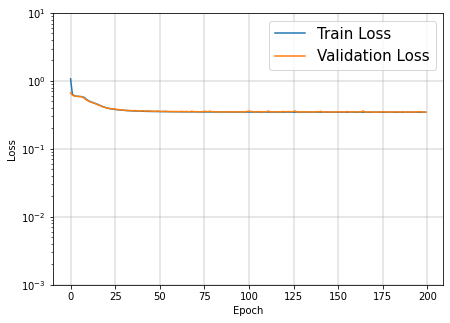

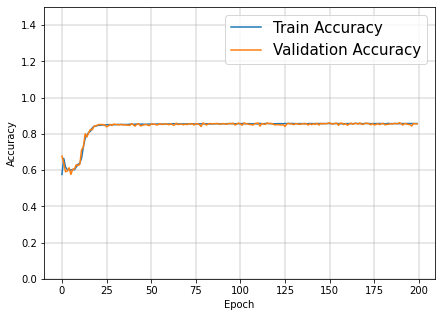

In [13]:
# Let us start by making plots of the loss and accuracy as a function of epochs
# We shall do this for the usual loss and accuracy (which is evaluated on the training dataset)
# and also val_loss and val_accuracy which are evaluated for the testing dataset


plt.figure(figsize=(7,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.001, 10])
plt.yscale('log')
plt.legend(loc='upper right',fontsize=15)
plt.grid('-',lw=2,alpha=0.3)
#plt.savefig('loss_v_epoch_disc.png')
plt.savefig(pp,format='pdf')


plt.figure(figsize=(7,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1.5])
plt.legend(loc='upper right',fontsize=15)
plt.grid('-',lw=2,alpha=0.3)
#plt.savefig('acc_v_epoch_disc.png')
plt.savefig(pp,format='pdf')

## Plot the output of the neural network
-  It is also called ```Neural Network score or nnscore```
-  We plot the score separately for 'signal' and 'background'
-  here signal is the target y of 1.0, and background is the target y of 0.0
-  We will plot this output separately for testing and training datasets
-  Thus there are 4 curves plotted, testing/training for signal/background


In [14]:
#Setup some new dataframes  t_df is training, v_df is testing (or validation)
t_df = pd.DataFrame()
v_df = pd.DataFrame()
t_df['train_truth'] = y_train.ravel()
t_df['train_prob'] = 0
v_df['test_truth'] = y_test.ravel()
v_df['test_prob'] = 0

In [15]:
# Now we evaluate the model on the test and train data by calling the predict function
train_pred_proba = model.predict(X_train)
val_pred_proba = model.predict(X_test)

t_df['train_prob'] = train_pred_proba
v_df['test_prob'] = val_pred_proba

Okay so now we have the two dataframes ready.
- t_df has two columns for training data  (train_truth and train_prob)
- v_df has two columns for testing data  (train_truth and train_prob)

Now plot the nnscore 

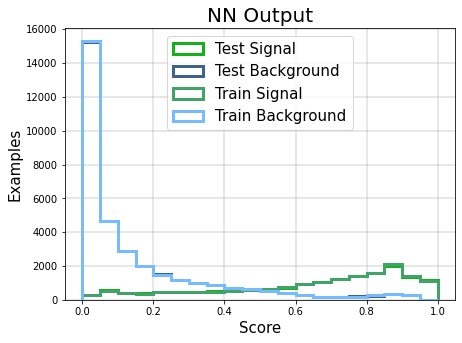

In [16]:
# Now we plot the NN output
mybins = np.arange(0,1.05,0.05)


plt.figure(figsize=(7,5))
plt.hist(v_df[v_df['test_truth']==1]['test_prob'],bins=mybins,histtype='step', label="Test Signal", linewidth=3, color='xkcd:green',density=False,log=False)
plt.hist(v_df[v_df['test_truth']==0]['test_prob'],bins=mybins,histtype='step', label="Test Background", linewidth=3, color='xkcd:denim',density=False,log=False)
plt.hist(t_df[t_df['train_truth']==1]['train_prob'],bins=mybins,histtype='step',label="Train Signal", linewidth=3, color='xkcd:greenish',density=False,log=False)
plt.hist(t_df[t_df['train_truth']==0]['train_prob'],bins=mybins,histtype='step',label="Train Background", linewidth=3, color='xkcd:sky blue',density=False,log=False)
plt.legend(loc='upper center',fontsize=15)
plt.xlabel('Score',fontsize=15)
plt.ylabel('Examples',fontsize=15)
plt.title(f'NN Output',fontsize=20)
plt.xticks([0.0,0.2,0.4,0.6,0.8,1.0],fontsize=10)
plt.yticks(fontsize=10)
plt.grid('-',lw=2,alpha=0.3)
#plt.savefig('NNscore.png')
plt.savefig(pp,format='pdf')

## ROC Curve

In [17]:
# Now we get the ROC curve, first for testing data
fpr, tpr, _ = roc_curve(y_test,val_pred_proba)
auc_score = auc(fpr,tpr)
# Now the ROC curve for training data
fpr1, tpr1, _ = roc_curve(y_train,train_pred_proba)
auc_score1 = auc(fpr1,tpr1)


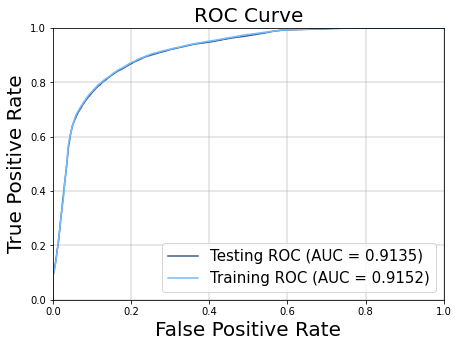

In [18]:
# We plot the ROC curves together each other to assess the performance

plt.figure(figsize=(7,5))
plt.plot(fpr,tpr,color='xkcd:denim blue', label='Testing ROC (AUC = %0.4f)' % auc_score)
plt.plot(fpr1,tpr1,color='xkcd:sky blue', label='Training ROC (AUC = %0.4f)' % auc_score1)
plt.legend(loc='lower right',fontsize=15)
plt.title(f'ROC Curve',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.xlim(0.,1.)
plt.ylim(0.,1.)
plt.grid('-',lw=2,alpha=0.3)
#plt.savefig('ROC.png')
plt.savefig(pp,format='pdf')


In [19]:
#close the pdffile
pp.close()